# 02-Análisis Exploratorio y Generación de Hipótesis

En este notebook exploraremos la data obtenida del análisis de churn en el notebook anterior. Posteriormente, se analizará el comportamiento de las variables obtenidas y se procederá a formular algunas hipótesis relacionadas con el comportamiento de la variable de interés.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from utils import *
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [11]:
##leer data churn y fuentes exploradas anteriormente
churn_data=pd.read_csv("churn_data.csv",sep=";",dtype={'Asegurado__c':str,'NumeroPoliza__c':str,'CodigoTipoAsegurado__c':str,'churn':int,'ClaseVehiculo__c':str,'TipoVehiculo__c':str,'PuntoVenta__c':str,'MarcaVehiculo__c':str},na_values="nan")

### Características Generales de la información

In [12]:
print("Total Registros para Churn ",churn_data.shape[0])
print("Total Columnas para Churn ",churn_data.shape[1])


Total Registros para Churn  64404
Total Columnas para Churn  26


In [13]:
## Extraer total de nulos por cada campo
churn_data.isnull().sum()

Asegurado__c                      0
CodigoTipoAsegurado__c            0
PuntoVenta__c                     0
tipo_poliza_name                  0
tipo_prod_desc                    0
ClaseVehiculo__c                  0
MarcaVehiculo__c              12899
MdeloVehiculo__c              12899
TipoVehiculo__c                   0
NumeroPoliza__c                   0
FechaInicioVigencia__ctrim        0
churn                             0
n_prod_prev                   61750
total_siniestros              60246
total_pagado_smmlv            60246
anios_ultimo_siniestro        60246
Activos__c                    58200
AnnualRevenue                 58200
MontoAnual__c                 64395
OtrosIngresos__c              59709
Profesion__pc                 64404
EgresosAnuales__c             58200
EstadoCivil__pc                9823
Genero__pc                     9823
ciudad_name                    9823
edad                          56027
dtype: int64

### Exploración univariada de las variables

Desde esta vista podemos ver que las variables MdeloVehiculo__c y MarcaVehiculo__c no tienen valores que permitan diferenciar algún comportamiento de la variable de interés, por tanto no serán incluidas.

In [14]:
##Estadísticas generales 
churn_data.describe()

,MdeloVehiculo__c,churn,n_prod_prev,total_siniestros,total_pagado_smmlv,anios_ultimo_siniestro,Activos__c,AnnualRevenue,MontoAnual__c,OtrosIngresos__c,Profesion__pc,EgresosAnuales__c,edad
count,51505.0,64404.000000,2654.000000,4158.000000,4158.000000,4158.000000,6.204000e+03,6.204000e+03,9.000000,4.695000e+03,0.0,6.204000e+03,8377.000000
mean,999.0,0.160689,3.058779,48.329245,2670.067165,0.272242,5.131441e+08,3.048760e+08,2579.111111,4.471255e+06,NaN,2.453587e+08,52.917734
std,0.0,0.367246,2.472070,63.059221,3785.493099,0.955527,2.312679e+09,2.063906e+09,6606.381166,6.176378e+07,NaN,1.938474e+09,24.954054
min,999.0,0.000000,1.000000,1.000000,0.000000,0.002740,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000e+00,1.506849
25%,999.0,0.000000,1.000000,3.000000,17.350016,0.005479,5.000000e+07,2.400000e+07,0.000000,0.000000e+00,NaN,1.200000e+07,36.084932
50%,999.0,0.000000,3.000000,20.000000,370.254177,0.010959,1.232190e+08,4.300000e+07,10.000000,0.000000e+00,NaN,2.500000e+07,47.443836
75%,999.0,0.000000,3.000000,38.000000,3065.269972,0.084932,3.311125e+08,9.600000e+07,102.000000,0.000000e+00,NaN,5.800000e+07,60.608219
max,999.0,1.000000,8.000000,940.000000,55871.956292,9.465753,8.310000e+10,7.253915e+10,20000.000000,3.479488e+09,NaN,7.173879e+10,122.432877


In [15]:
for col in churn_data.drop(columns=["Asegurado__c","PuntoVenta__c","anios_ultimo_siniestro","total_pagado_smmlv","NumeroPoliza__c","FechaInicioVigencia__ctrim"]).columns:
    if churn_data[col].dtype=="O":
        print(churn_data.groupby(col).agg({'churn':'count'}))

                        churn
CodigoTipoAsegurado__c       
1                       61551
2                         838
3                         759
4                        1256
                                               churn
tipo_poliza_name                                    
colectiva                                        158
de daños                                         470
de daños tradicional                            1136
de deudores hipotecarios                         743
de disposiciones legales                          24
flotante                                         456
global sector privado                            412
individual                                      4596
normal                                           255
otras                                           1564
responsabilidad civil                           2602
s.o.a.t                                        51505
todo riesgo de obras civiles daños materiales    416
unica a favor de entidade

## Reporte General

Mediante Pandas Profiling podemos obtener una vista general de los datos, este reporte se exporta en archivos .html o insertado dentro del notebook.

In [16]:
from pandas_profiling import ProfileReport

##para visualizar abrir reporte_churn.html en navegador
reporte=ProfileReport(churn_data.drop(columns=['Asegurado__c']),title="Reporte Data Churn",explorative=True)
reporte.to_file("reporte_churn.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 37.72it/s]


- De este análisis univariado podemos concluir que existen variables con elevado número de faltantes MdeloVehiculo__c y MarcaVehiculo__c  (21.7%). Sin embargo es de esperarse este comportamiento ya que son variables que se generan a partir del registro de siniestros del cliente. A su vez, solo se está analizando información disponible para el MVP.

- Existen variables con alta correlación las cuales deberán ser utilizadas cuidadosamente en pasos posteriores.

## Interacciones con variable Objetivo

En esta sección analizamos el comportamiento de la variable objetivo en función de las variables predictoras 

In [17]:
#crear lista con nombres de columnas tipo numérico y tipo cadena(string)
num_cols=[i for i in churn_data.columns.values.tolist() if churn_data[i].dtype!="O" and i not in ['churn','Profesion__pc','Asegurado__c','CodigoTipoAsegurado__c','PuntoVenta__c','RamoTecnico__c','Tipo_poliza_c']]
str_cols=[i for i in churn_data.columns.values.tolist() if churn_data[i].dtype not in ["int32","float","int64"] and i not in ['churn','NumeroPoliza__c','Producto__c','Asegurado__c','CodigoTipoAsegurado__c','PuntoVenta__c','RamoTecnico__c','Tipo_poliza_c']]

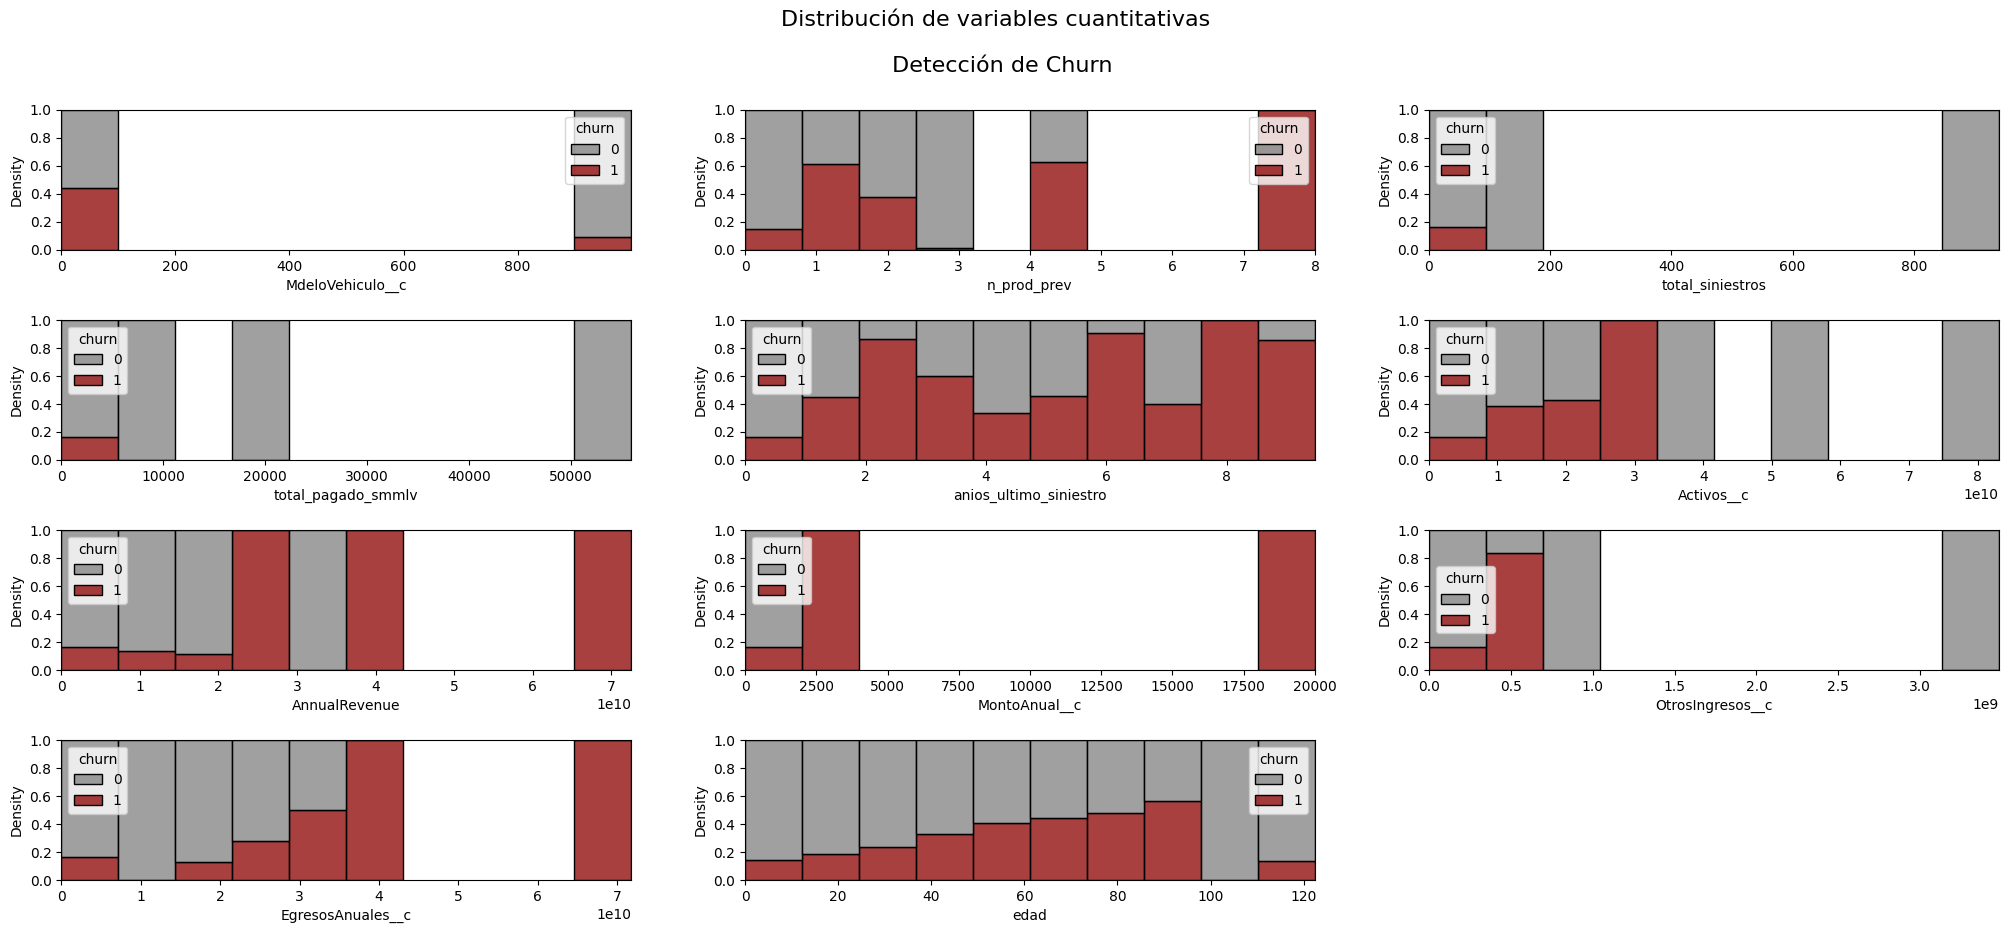

In [18]:
fig = plt.figure(figsize=(25, 10))
size_grid=int(len(num_cols)/2)  if len(num_cols)%2==0 else int((len(str_cols)/2)+1)
for idx,col in enumerate(num_cols):
    aux_data=churn_data[['churn',col]].fillna(0)
    ax=fig.add_subplot(4,3,idx+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.histplot(x=col,hue="churn",data=aux_data,ax=ax,multiple="fill",stat="density",bins=10,palette={0:'gray',1:'darkred'})


fig.suptitle("Distribución de variables cuantitativas \n \n Detección de Churn",size=16);

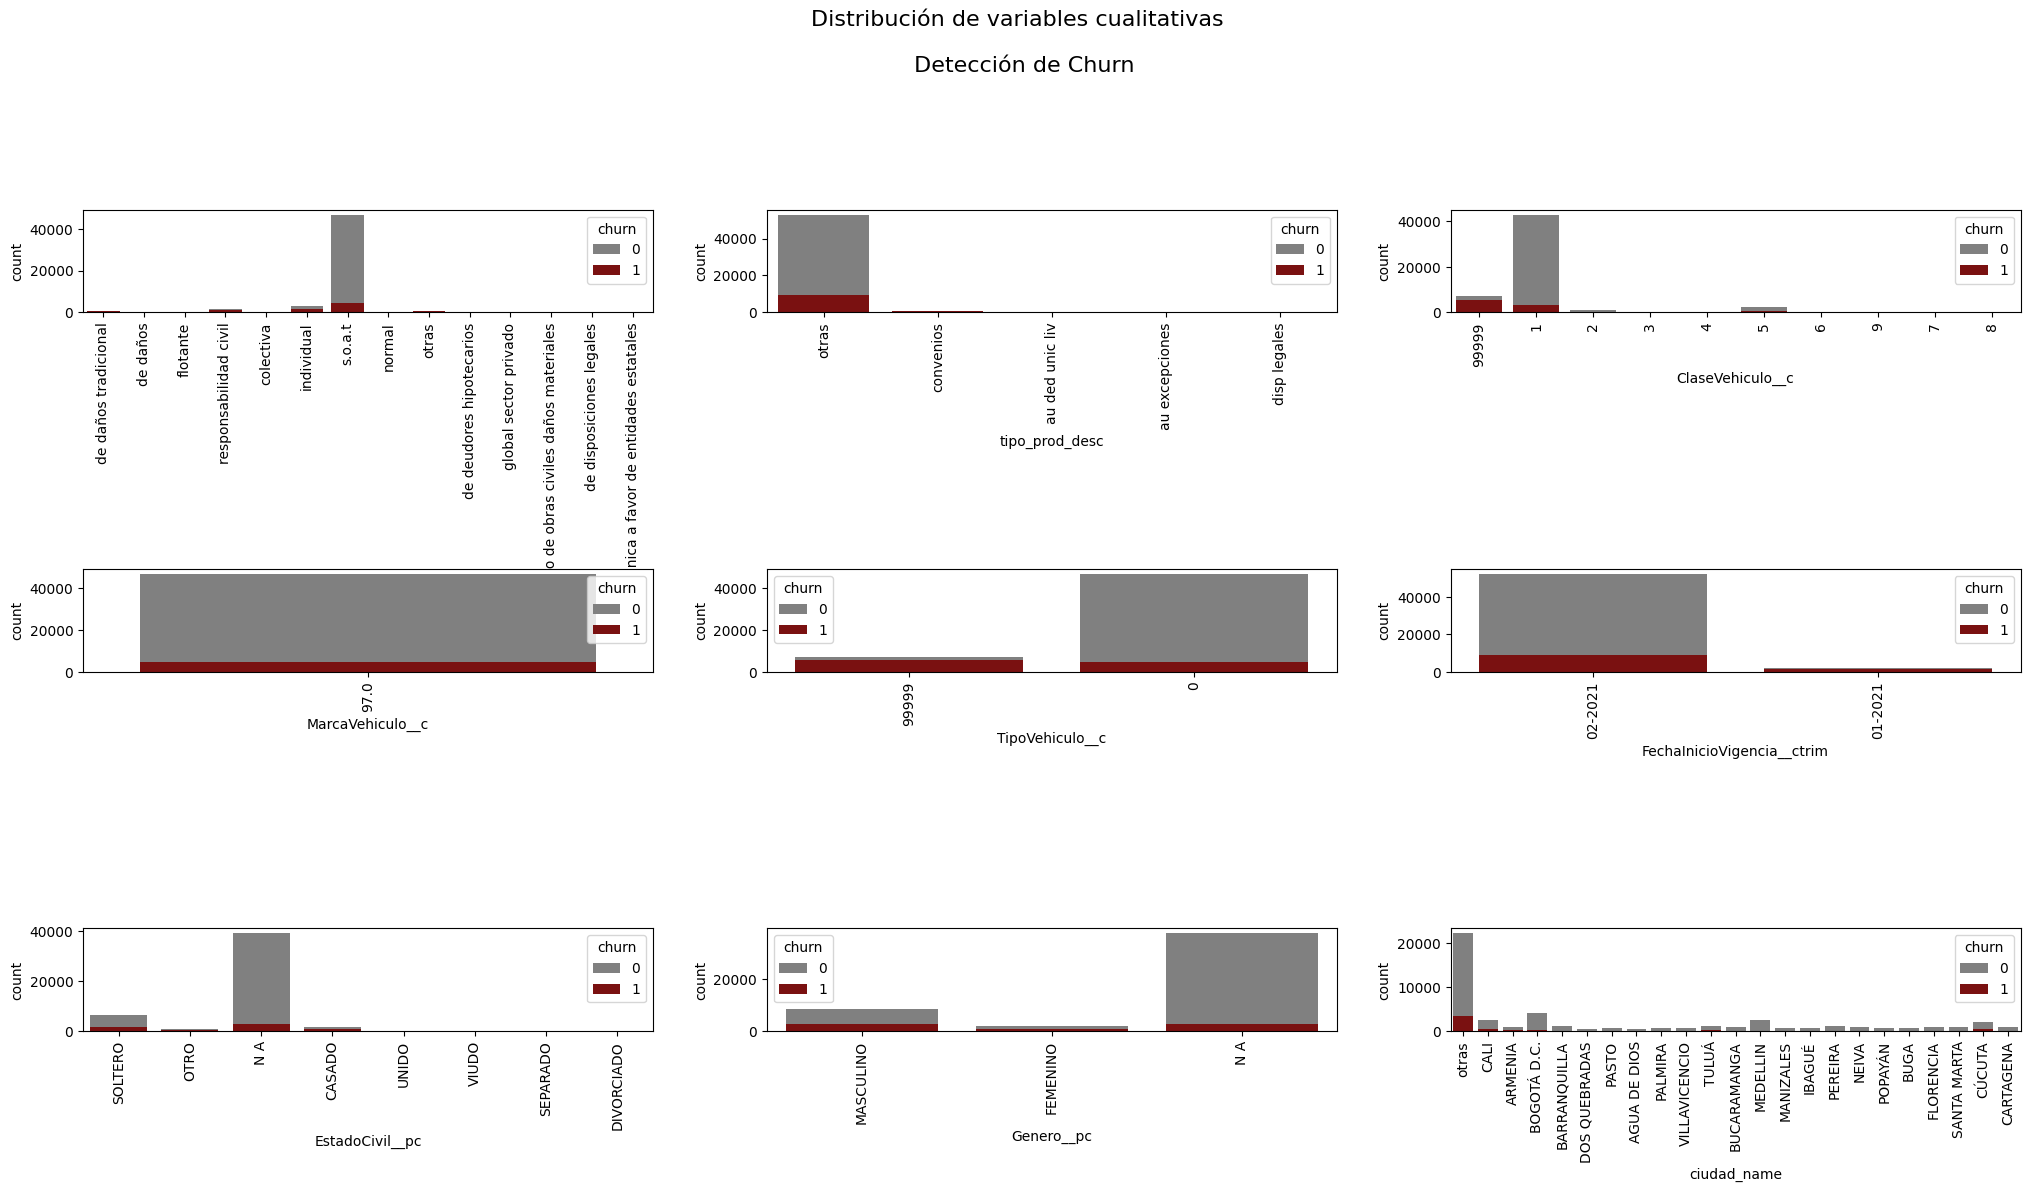

In [21]:
fig = plt.figure(figsize=(25, 20))
fig.tight_layout()
size_grid=int(len(str_cols)/2)  if len(str_cols)%2==0 else int((len(str_cols)/2)+1)
for idx,col in enumerate(str_cols):
    aux_data=churn_data[['churn',col]].fillna("Nulo")
    ax=fig.add_subplot(size_grid,3,idx+1)
    plt.subplots_adjust(hspace = 2.5)
    sns.countplot(x=col,hue="churn",dodge=False,data=churn_data,ax=ax,palette={0:'gray',1:'darkred'})
    plt.xticks(rotation=90);
    
    del aux_data

fig.suptitle("Distribución de variables cualitativas \n \n Detección de Churn",size=16);

### Discusión y Generación de Hipótesis

- Como se ve en los gráficos anteriores, es notorio que los clientes que abandonan o no renuevan su producto, tienen mayor proporción en los sectores de mayores indicadores económicos (Mayores ingresos,activos). El tipo de producto es también un indicador necesario para estimar la continuidad del cliente. 
- El género y la edad se observan como posibles indicadores del comportamiento del cliente al momento de renovar o no el producto.
- A su vez el comportamiento del cliente con la compañía es también es un posible indicador de fidelización. En campos como el número de productos contratados antes (`n_prod_prev`),el total que se le ha pagado por sinietros en SMMLV (`total_pagado_smmlv`) y años desde el último sinietros (`anios_ultimo_siniestro`), puede observarse un comportamiento diferencial.

Por tanto se generan las hipótesis:

¿Hay evidencia para pensar que el comportamiento de churn es diferente por los siguientes aspectos?
- Género
- Edad
- Tipo de producto
- Productos previos
- tiempo desde el último siniestro
- Beneficios recibidos por la compañía

### Validación de Hipótesis

Debido a la naturaleza de las variables es necesario validar las hipótesis usando diferentes test estadísticos. En este caso, si deseamos comparar variables nominales contra el comportamiento del churn, usaremos la prueba Chi-cuadrado de independencia. En caso contrario, en el que la variable a comparar es continua u ordinal, usaremos la medida de asociación de Tau-Kendall-b. Todas se encuentran implementadas dentro de la librería `scipy`. Nuestra hipótesis nula para cada una de las pruebas, será asumir que no existe diferencia entre el comportamiento del churn para las categorías de una variable (en caso de que sea nominal) o que la asociación entre una variable (en caso continuo u ordinal) y el churn es cero. Se usará un nivel de significancia `alpha=0.1`.

In [22]:
from scipy.stats import chi2_contingency,kendalltau

In [23]:
def get_differences(data,col_drop=['Asegurado__c','NumeroPoliza__c','Profesion__pc','FechaInicioVigencia__ctrim']):

  c1=data.drop(columns=col_drop+["churn"]).columns.values.tolist()
  values=[]
  pv=[]
  for i in c1:
    data_aux=data[['churn',i]].dropna()
    if data[i].dtype=="O":
        
        g, p, dof, expctd = chi2_contingency(pd.crosstab(data_aux[i],data_aux['churn']))
        values.append("{} - churn | p.val ={:.2f}) usando {:.2%} de las filas (sin valores faltantes)".format(i,p,data_aux.shape[0]/data.shape[0]))
        pv.append(p)
    else:
        cor,p=kendalltau(data_aux[i],data_aux['churn'])
        values.append("{} - churn | correlation {:.2f} (p={:.2f}) usando {:.2%} de las filas (sin valores faltantes)".format(i,cor,p,data_aux.shape[0]/data.shape[0]))
        pv.append(p)
    del data_aux
  
  return(pd.DataFrame({'variable':c1,"p_val":pv}),values)

resultados,mensaje=get_differences(churn_data)
alpha=0.1 #nivel de significancia
#Revisar en que variables existe evidencia que sugiere la posible existencia de diferencias en el comportamiento del churn por sus categorías.
resultados[resultados['p_val']<alpha]

,variable,p_val
0,CodigoTipoAsegurado__c,0.000000e+00
1,PuntoVenta__c,0.000000e+00
2,tipo_poliza_name,0.000000e+00
3,tipo_prod_desc,0.000000e+00
4,ClaseVehiculo__c,0.000000e+00
7,TipoVehiculo__c,0.000000e+00
9,total_siniestros,3.504312e-52
10,total_pagado_smmlv,1.678007e-74
11,anios_ultimo_siniestro,2.593854e-34
12,Activos__c,5.523145e-34


## Conclusiones

- De acuerdo con el análisis univariado y las pruebas de hipótesis, existe evidencia que sugiere que el comportamiento del churn depende de variables como el tipo,clase de vehículo. A su vez influyen aspectos económicos como los ingresos y egresos anuales. La dimensión sociodemográfica es también relevante, en cuanto al género y edad del asegurado.
- Se encontró evidencia con la cual podría pensarse que el comportamiento de churn es diferente para los productos analizados y que depende además del punto de venta en el que fue generado.

In [24]:
## Exportar data para modelación
churn_data.drop(columns=['Profesion__pc','MdeloVehiculo__c','MarcaVehiculo__c','FechaInicioVigencia__ctrim']).to_csv("data_modelacion.csv",sep=";",index=False)